In [6]:
import pickle
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from utils import load_state, visualize_3d_terrain, visualize_terrain

from functions import slopes_to_height

In [ ]:
run_folder = "results/run_multi_input"
for folder in os.listdir(run_folder):
    for file in glob.glob(os.path.join(run_folder, folder, "wfc_out*.pkl")):
        os.remove(file)
        continue
        # a = load_state(file)
        # f, ext = os.path.splitext(file)
        # np.save(f + '.npy', a)
        out = np.load(file)
        if np.all(out == 0):
            print(file)
            os.remove(file)
        continue
        if not np.all(out == 0):
            # print(file)
            h_out = slopes_to_height(out[..., 0], out[..., 1])
            
            visualize_terrain(h_out)
            visualize_3d_terrain(h_out)
    
    print('---------------------------------')
    # print('---------------------------------')
    # print('---------------------------------')
    # print('---------------------------------')
    # print('---------------------------------')
    

---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------


In [ ]:
import rasterio


In [ ]:
scale_factor = 1.0 / 8


with rasterio.open(r"D:\Kar\GameDev\PCG\WaveFunctionCollapse\data\N30E054.hgt") as src:
        # Define the desired smaller shape (for example, half the original size)
        new_height = int(src.height * scale_factor)
        new_width = int(src.width * scale_factor)

        # Read and resample the data to the new shape
        sample_data = [src.read(
            1,  # First band
            out_shape=(new_height, new_width),
            resampling=rasterio.enums.Resampling.bilinear  # Choose the resampling method
        ).astype(float)[250:350, 200:300]]

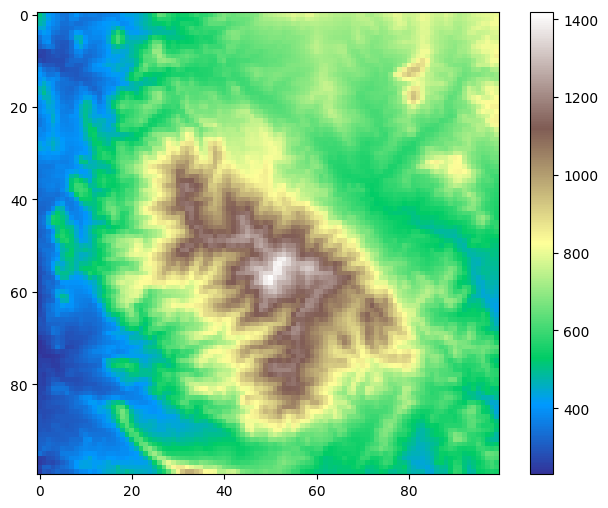

In [18]:
visualize_terrain(sample_data[0])

In [7]:
from WFC import WaveFunctionCollapse
run_folder = "results/run_multi_input"
for folder in os.listdir(run_folder):
    for file in glob.glob(os.path.join(run_folder, folder, "wfc_sta*.pkl")):
        save_path = os.path.join(run_folder, folder, 'wfc_state')
        w = load_state(file)
        WaveFunctionCollapse.save(w, save_path)

ModuleNotFoundError: No module named 'numpy._core'